__Постановка задачи__

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
- провести исследовательский анализ данных,
- визуализировать результаты и сделать из них выводы, 
- провести предобработку признаков (возможно создать новые),
- обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
- оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор
- проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя)

__Данные__

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM.

__Описание данных__

- Customer - идентификатор пользователя
- State - штат
- Customer Lifetime Value - LTV пользователя
- Response - взаимодействие с рекламой
- Coverage - тип страхового покрытия
- Education - образование
- Effective to date - срок действия страховки
- EmploymentStatus - трудоустройство
- Gender - пол
- Income - доход
- Location code - тип местности в которой проживает пользователь
- Marital Status - семейное положение
- Monthly Premium Auto 
- Months Since Last Claim - месяцев с последнего требования по выплате компенсации
- Months Since Policy Inception - месяцев с открытия страховки
- Number of Open Complaints - количество незакрытых жалоб
- Number of Policies - количество полисов
- Policy Type - тип страховки
- Policy - страховка
- Renew Offer Type - обновленный тип предложения
- Sales Channel - канал продаж
- Total Claim Amount - сумма выплаченных компенсаций
- Vehicle Class - класс автомобиля
- Vehicle Size - размер автомобиля

## Чтение данных и импорт нужных библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
sns.set(style="darkgrid")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta,date
import plotly.express as px
from itertools import combinations
from scipy.stats import ttest_ind


from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from catboost import Pool

from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
 

from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from numpy import sort
from sklearn.feature_selection import SelectFromModel

from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [11]:
data = pd.read_csv('LTV.csv')

In [95]:
display(data.head(10))
data.info()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Датасет состоит из данных о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. В датасете 24 колонки, 8 из которых числовые. Во всех столбцах отсутствуют пустые значения. 

## Исследовательский анализ данных и визуализация

посмотрим бегло на данные

In [11]:
#сначала на числовые
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [22]:
#потом на категориальные
data.astype('object').describe()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134.0,9134,9134
unique,9134,5,8041.000000,2,3,5,59,5,2,5694,3,3,202,36,100,6,9,3,9,4,4,5106.0,6,3
top,QR15221,California,3567.503755,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,0,Suburban,Married,65,3,59,0,1,Personal Auto,Personal L3,Offer1,Agent,316.8,Four-Door Car,Medsize
freq,1,3150,6.000000,7826,5568,2748,195,5698,4658,2317,5779,5298,348,381,142,7252,3251,6788,3426,3752,3477,116.0,4621,6424


In [12]:
#оценим кол-во повторяющихся значений
data.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

Нет дубликатов в колонке Customer, и это хорошо, не придется ничего удалять пока

Напишем функцию, которая покажет нам распределение признаков, выдаст процент пропусков и покажет выбросы для столбцов, у которых определены значения (но таких признаков нет)

In [57]:
def desription(data, col, boundaries = None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    if data.loc[:, col].dtypes == np.dtype('O'): # Проверка на строковый тип данных
        sns.countplot(data.loc[:, col], ax=ax)
        plt.show()
    else:
        
        data.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None: # Проверка на наличие выбросов по информации из датасета
            if data.loc[(~data.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(data.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(data.loc[(~data.loc[:, col].between(boundaries[0], boundaries[1]))&
                       pd.notnull(data.loc[:, col])])
                
    print('Процент пропусков:', str(round(100 - data.loc[:, col].count()/data.shape[0]*100, 2)) + '%')
    print()
    print('Детальное описание:')
    print(data.loc[:, col].describe())
    print()
    print('Значения признака:')
    print(data.loc[:, col].value_counts(dropna=False, normalize=True))
    

Столбец Customer
Распределение признака:


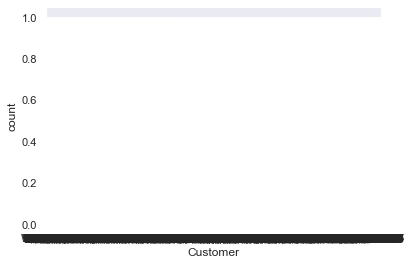

Процент пропусков: 0.0%

Детальное описание:
count        9134
unique       9134
top       QR15221
freq            1
Name: Customer, dtype: object

Значения признака:
QR15221    0.000109
IL19217    0.000109
DC79319    0.000109
EJ95100    0.000109
DI19952    0.000109
             ...   
IQ82914    0.000109
TQ82322    0.000109
YO41331    0.000109
JZ61422    0.000109
ZU91897    0.000109
Name: Customer, Length: 9134, dtype: float64
Столбец State
Распределение признака:


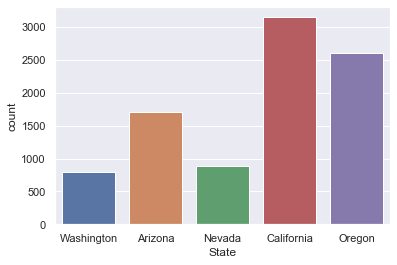

Процент пропусков: 0.0%

Детальное описание:
count           9134
unique             5
top       California
freq            3150
Name: State, dtype: object

Значения признака:
California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64
Столбец Customer Lifetime Value
Распределение признака:


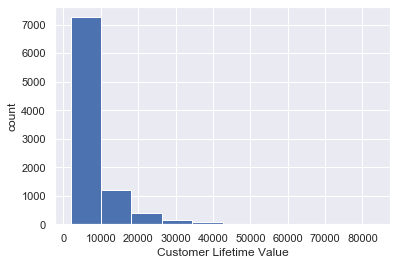

Процент пропусков: 0.0%

Детальное описание:
count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Значения признака:
2300.691547     0.000657
6057.072080     0.000657
6005.214792     0.000657
8819.018934     0.000657
4984.618655     0.000657
                  ...   
12206.892080    0.000109
3728.830130     0.000109
2456.816647     0.000109
2675.029491     0.000109
4491.909095     0.000109
Name: Customer Lifetime Value, Length: 8041, dtype: float64
Столбец Response
Распределение признака:


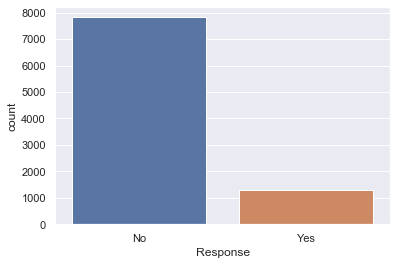

Процент пропусков: 0.0%

Детальное описание:
count     9134
unique       2
top         No
freq      7826
Name: Response, dtype: object

Значения признака:
No     0.856799
Yes    0.143201
Name: Response, dtype: float64
Столбец Coverage
Распределение признака:


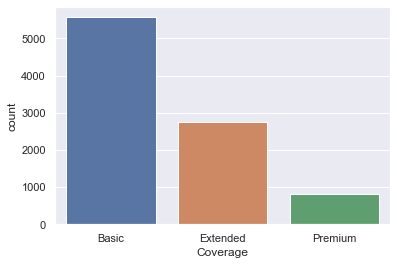

Процент пропусков: 0.0%

Детальное описание:
count      9134
unique        3
top       Basic
freq       5568
Name: Coverage, dtype: object

Значения признака:
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: Coverage, dtype: float64
Столбец Education
Распределение признака:


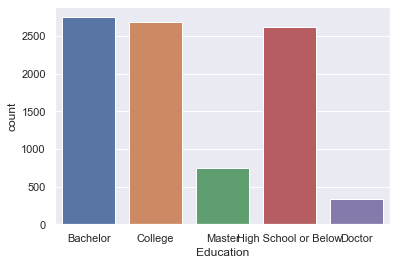

Процент пропусков: 0.0%

Детальное описание:
count         9134
unique           5
top       Bachelor
freq          2748
Name: Education, dtype: object

Значения признака:
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: Education, dtype: float64
Столбец Effective To Date
Распределение признака:


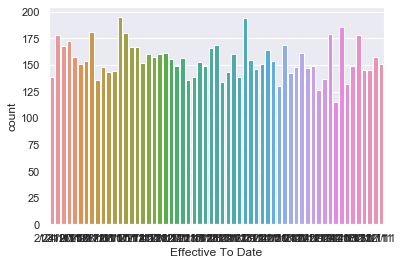

Процент пропусков: 0.0%

Детальное описание:
count        9134
unique         59
top       1/10/11
freq          195
Name: Effective To Date, dtype: object

Значения признака:
1/10/11    0.021349
1/27/11    0.021239
2/14/11    0.020363
1/26/11    0.019816
1/17/11    0.019707
             ...   
2/8/11     0.014670
2/20/11    0.014451
2/15/11    0.014233
1/12/11    0.013795
1/4/11     0.012590
Name: Effective To Date, Length: 59, dtype: float64
Столбец EmploymentStatus
Распределение признака:


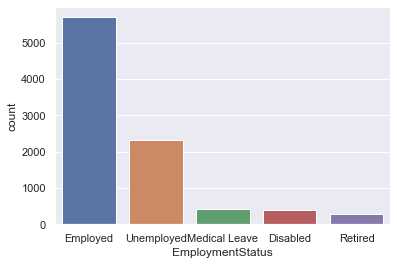

Процент пропусков: 0.0%

Детальное описание:
count         9134
unique           5
top       Employed
freq          5698
Name: EmploymentStatus, dtype: object

Значения признака:
Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: EmploymentStatus, dtype: float64
Столбец Gender
Распределение признака:


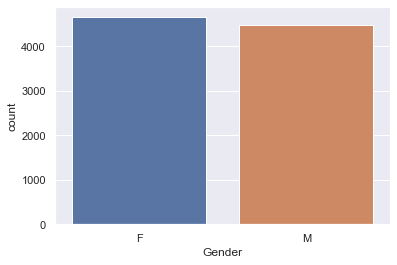

Процент пропусков: 0.0%

Детальное описание:
count     9134
unique       2
top          F
freq      4658
Name: Gender, dtype: object

Значения признака:
F    0.509963
M    0.490037
Name: Gender, dtype: float64
Столбец Income
Распределение признака:


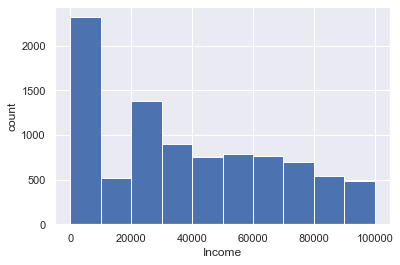

Процент пропусков: 0.0%

Детальное описание:
count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

Значения признака:
0        0.253668
95697    0.001314
40864    0.000766
24910    0.000766
25965    0.000766
           ...   
26952    0.000109
84300    0.000109
22862    0.000109
20815    0.000109
57240    0.000109
Name: Income, Length: 5694, dtype: float64
Столбец Location Code
Распределение признака:


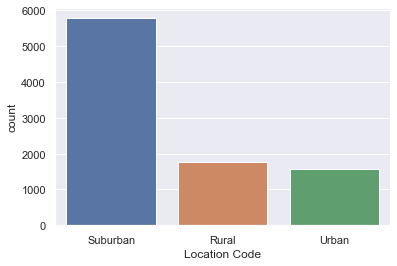

Процент пропусков: 0.0%

Детальное описание:
count         9134
unique           3
top       Suburban
freq          5779
Name: Location Code, dtype: object

Значения признака:
Suburban    0.632691
Rural       0.194110
Urban       0.173199
Name: Location Code, dtype: float64
Столбец Marital Status
Распределение признака:


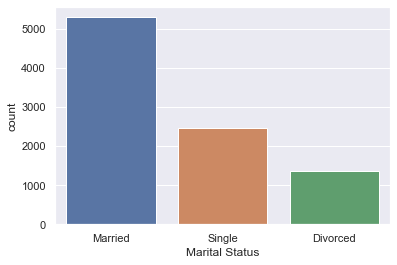

Процент пропусков: 0.0%

Детальное описание:
count        9134
unique          3
top       Married
freq         5298
Name: Marital Status, dtype: object

Значения признака:
Married     0.580031
Single      0.270090
Divorced    0.149880
Name: Marital Status, dtype: float64
Столбец Monthly Premium Auto
Распределение признака:


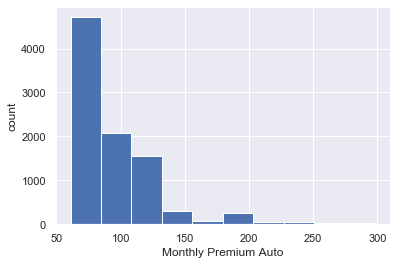

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

Значения признака:
65     0.038099
66     0.033611
71     0.033282
73     0.033063
63     0.031640
         ...   
231    0.000109
209    0.000109
204    0.000109
268    0.000109
284    0.000109
Name: Monthly Premium Auto, Length: 202, dtype: float64
Столбец Months Since Last Claim
Распределение признака:


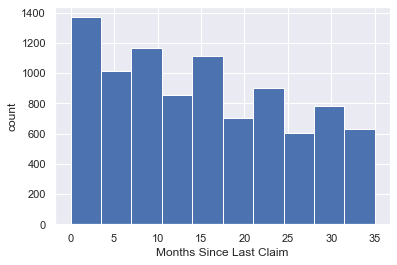

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean       15.097000
std        10.073257
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: float64

Значения признака:
3     0.041712
6     0.039851
1     0.037771
4     0.036676
7     0.036457
2     0.036019
0     0.034377
5     0.034268
10    0.033501
11    0.032516
16    0.032297
15    0.031312
13    0.031202
8     0.030545
12    0.029888
14    0.029341
17    0.028794
9     0.027370
19    0.026932
23    0.026166
25    0.025838
21    0.025509
20    0.025290
18    0.025071
22    0.023867
24    0.023101
29    0.022553
28    0.022006
31    0.020801
26    0.020363
27    0.019926
30    0.019926
33    0.019597
34    0.018502
35    0.015546
32    0.015108
Name: Months Since Last Claim, dtype: float64
Столбец Months Since Policy Inception
Распределение признака:


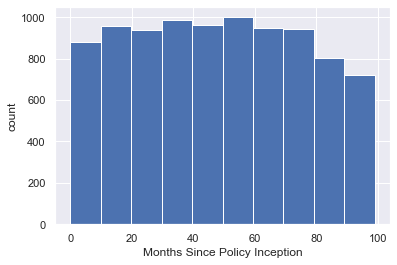

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

Значения признака:
59    0.015546
61    0.014014
50    0.013685
44    0.012590
10    0.012481
        ...   
16    0.007664
96    0.007335
82    0.006131
98    0.005912
97    0.005693
Name: Months Since Policy Inception, Length: 100, dtype: float64
Столбец Number of Open Complaints
Распределение признака:


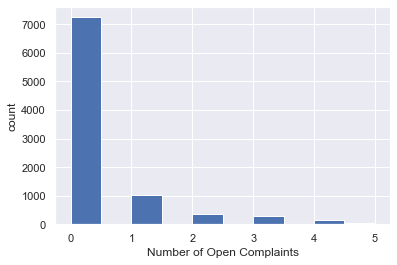

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean        0.384388
std         0.910384
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Number of Open Complaints, dtype: float64

Значения признака:
0    0.793957
1    0.110685
2    0.040946
3    0.031968
4    0.016313
5    0.006131
Name: Number of Open Complaints, dtype: float64
Столбец Number of Policies
Распределение признака:


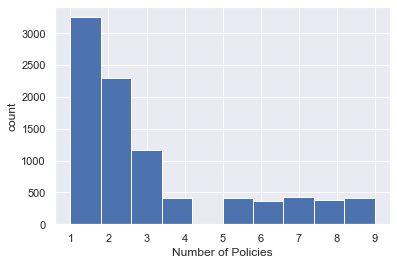

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean        2.966170
std         2.390182
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

Значения признака:
1    0.355923
2    0.251150
3    0.127874
7    0.047405
9    0.045544
4    0.044778
5    0.044559
8    0.042041
6    0.040727
Name: Number of Policies, dtype: float64
Столбец Policy Type
Распределение признака:


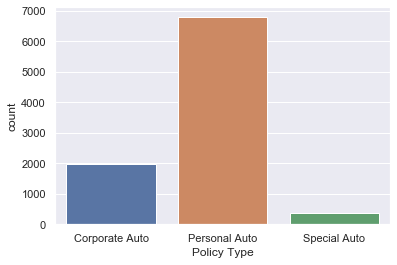

Процент пропусков: 0.0%

Детальное описание:
count              9134
unique                3
top       Personal Auto
freq               6788
Name: Policy Type, dtype: object

Значения признака:
Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: Policy Type, dtype: float64
Столбец Policy
Распределение признака:


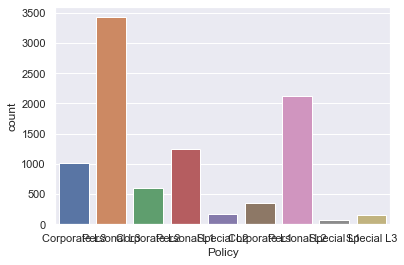

Процент пропусков: 0.0%

Детальное описание:
count            9134
unique              9
top       Personal L3
freq             3426
Name: Policy, dtype: object

Значения признака:
Personal L3     0.375082
Personal L2     0.232319
Personal L1     0.135757
Corporate L3    0.111014
Corporate L2    0.065141
Corporate L1    0.039304
Special L2      0.017955
Special L3      0.016203
Special L1      0.007226
Name: Policy, dtype: float64
Столбец Renew Offer Type
Распределение признака:


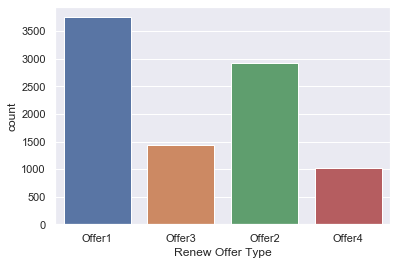

Процент пропусков: 0.0%

Детальное описание:
count       9134
unique         4
top       Offer1
freq        3752
Name: Renew Offer Type, dtype: object

Значения признака:
Offer1    0.410773
Offer2    0.320342
Offer3    0.156777
Offer4    0.112109
Name: Renew Offer Type, dtype: float64
Столбец Sales Channel
Распределение признака:


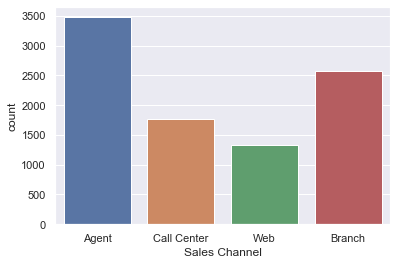

Процент пропусков: 0.0%

Детальное описание:
count      9134
unique        4
top       Agent
freq       3477
Name: Sales Channel, dtype: object

Значения признака:
Agent          0.380666
Branch         0.281038
Call Center    0.193234
Web            0.145062
Name: Sales Channel, dtype: float64
Столбец Total Claim Amount
Распределение признака:


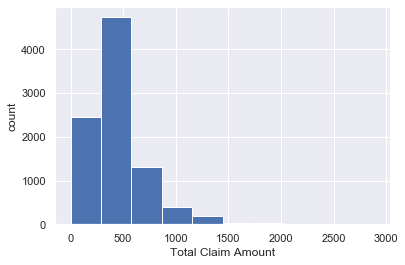

Процент пропусков: 0.0%

Детальное описание:
count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

Значения признака:
316.800000    0.012700
292.800000    0.012043
312.000000    0.011824
350.400000    0.011496
331.200000    0.011167
                ...   
212.009825    0.000109
314.880326    0.000109
707.925645    0.000109
246.993145    0.000109
204.620759    0.000109
Name: Total Claim Amount, Length: 5106, dtype: float64
Столбец Vehicle Class
Распределение признака:


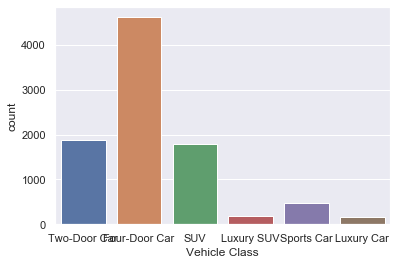

Процент пропусков: 0.0%

Детальное описание:
count              9134
unique                6
top       Four-Door Car
freq               4621
Name: Vehicle Class, dtype: object

Значения признака:
Four-Door Car    0.505912
Two-Door Car     0.206481
SUV              0.196628
Sports Car       0.052989
Luxury SUV       0.020145
Luxury Car       0.017845
Name: Vehicle Class, dtype: float64
Столбец Vehicle Size
Распределение признака:


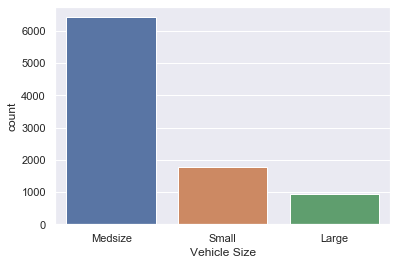

Процент пропусков: 0.0%

Детальное описание:
count        9134
unique          3
top       Medsize
freq         6424
Name: Vehicle Size, dtype: object

Значения признака:
Medsize    0.703306
Small      0.193125
Large      0.103569
Name: Vehicle Size, dtype: float64


In [9]:
for col in data.columns:
    desription(data, col)

- у почти всех числовых признаков логнормальное распределение (с "тяжелым хвостом"), чтобы от этого избавиться следует прологарифмировать эти признаки
- пропусков нет 

Переведем значения признака Effective To Date в формат datetime

In [17]:
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

Заменим yes/no в колонке Response на 0 и 1

In [35]:
data['Response'] = data['Response'].apply(lambda x: 0 if x=='No' else 1)

Посмотрим на выбросы

In [55]:
def bxplt(data, col):
    if data.loc[:, col].dtypes == np.dtype('float64') or data.loc[:, col].dtypes == np.dtype('int64'):
        sns.boxplot(data.loc[:, col])
        plt.show()

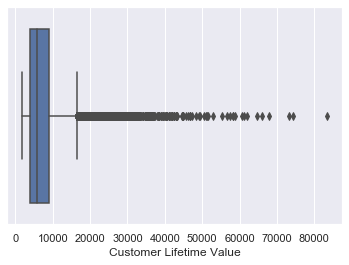

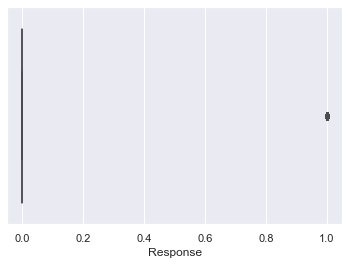

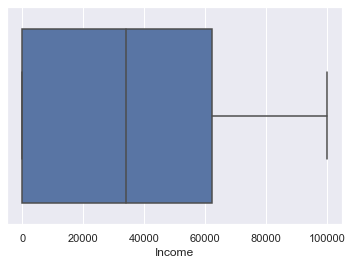

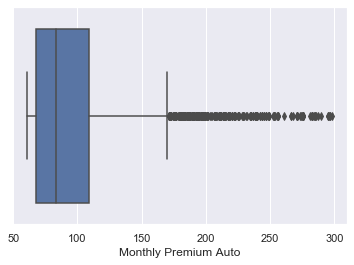

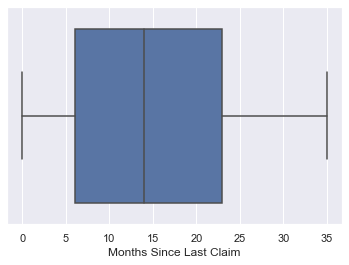

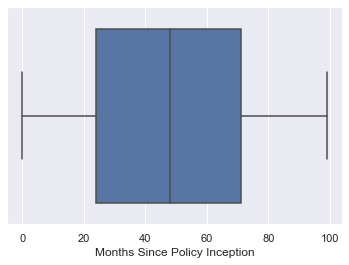

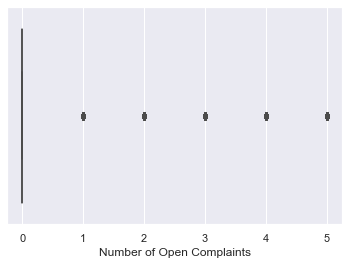

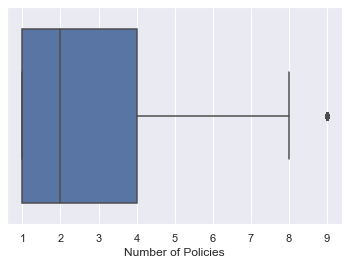

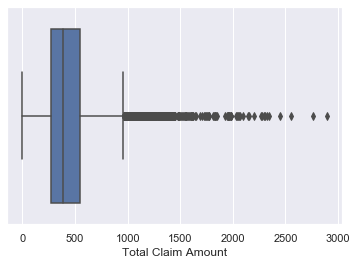

In [56]:
for col in data.columns:
    bxplt(data, col)

Как мы видим, есть выбросы почти во всех признаках.НО, мы не будем их удалять или заменять, потому что данные относятся к страхованию и клиентов с такими характеристиками надо учитывать

In [59]:
#посмотрим на матрицу корреляции
data.corr()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,-0.008930,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Response,-0.008930,1.000000,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877
Income,0.024366,0.011932,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,0.010966,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.016597,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,0.002952,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,-0.009881,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.020891,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,0.016877,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


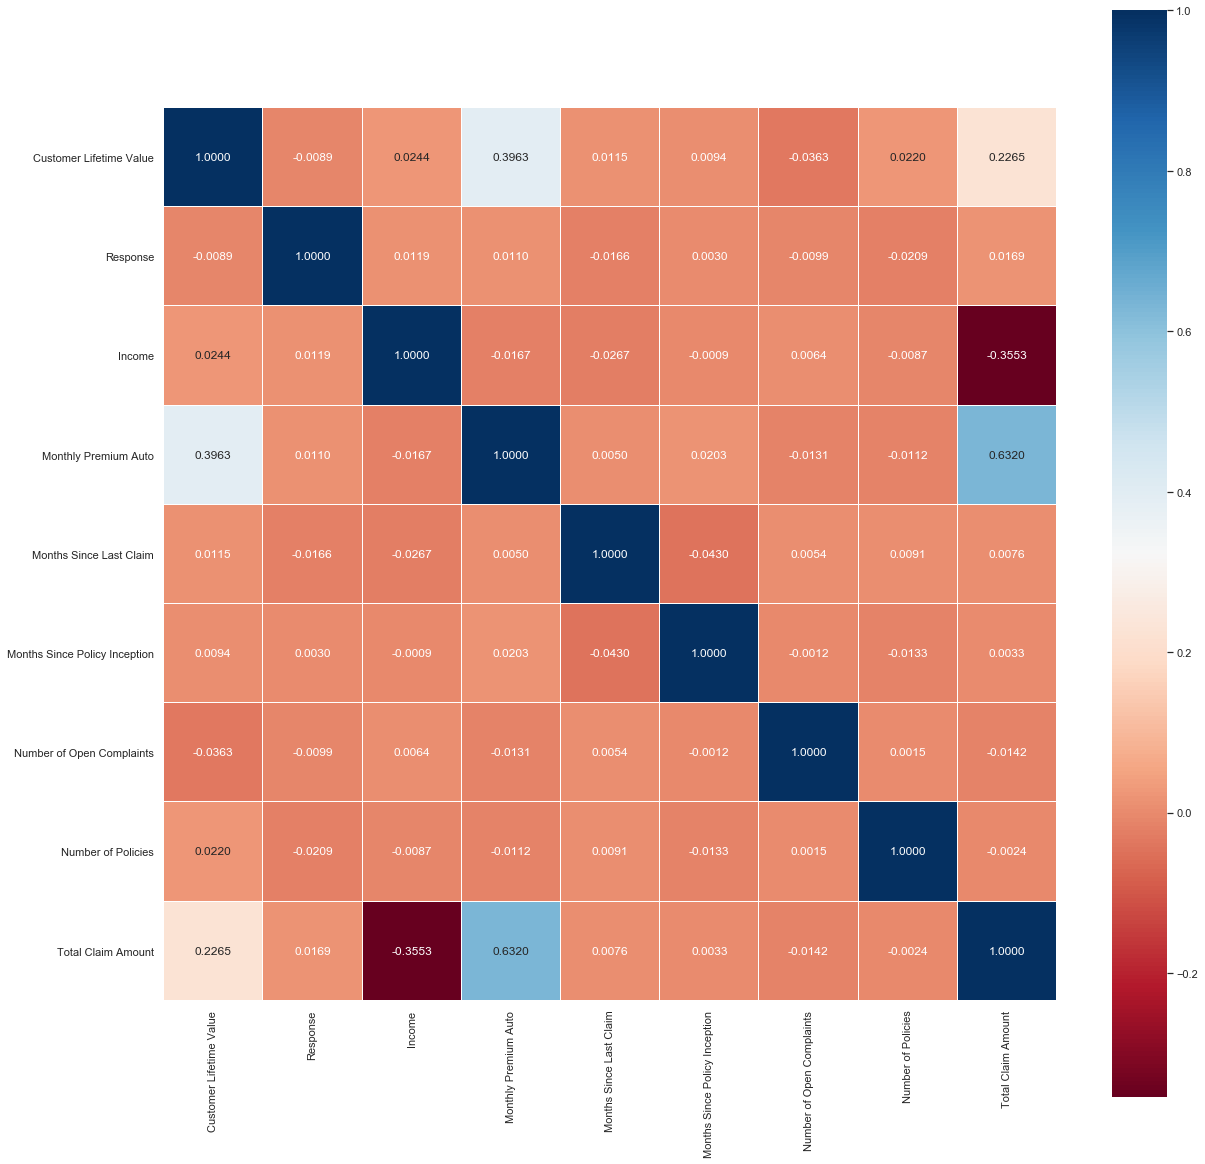

In [60]:
#строим тепловую карту 
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".4f", linewidths=0.1, cmap="RdBu")

Customer Lifetime Value положительно коррелирует с Monthly PremiuLm Audio. 

Есть сильно скоррелированные параметры (например, Total Claim Amount и Income, Total Claim Amount и Monthly PremiuLm Audio. Это означает, что следует часть признаков удалить, хотя для некоторых моделей (например, случайный лес)мультиколлинеарность не является проблемой

Не стоит доверять корреляционному анализу слепо и выкидывать признаки из модели. Нельзя ни в коем случае смотреть на то, как скоррелированы признаки и целевая переменная: если сильно коррелирует, то признак значимый - оставляем, если слабо - удаляем. Мы не можем просто так удалять данные, если коэфициент корреляции низкий. Если признак1 влияет в два раза слабее, чем признак2 это не повод выбрасывать признак1, он все равно значимый для модели. Для определения этого и существует t-test, и основанная на нем p-value для тестирования нулевой гипотезы, что признак1 не является значимым.

Прежде чем приступить к расчету p-value, посмотрим на категориальные признаки

Напишем функцию, которая для номинативных переменных покажет распределение CLV в зависимости от признака, а также покажет статистическую значимость этих различий.

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения дохода в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

In [77]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Customer Lifetime Value', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

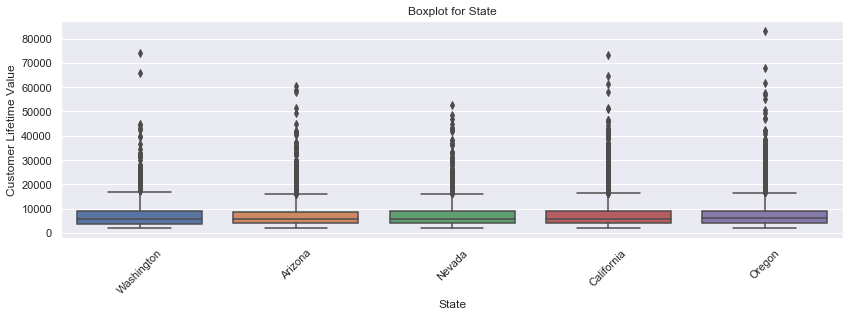

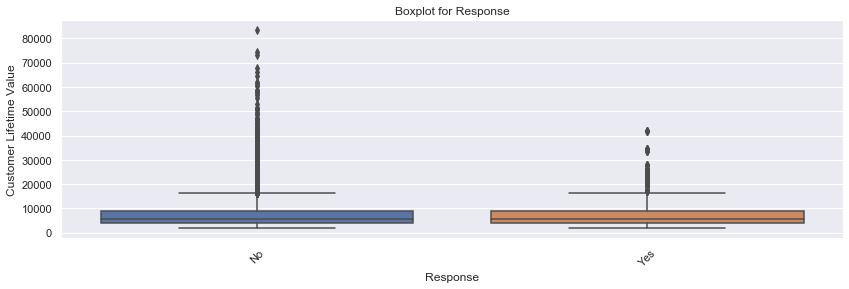

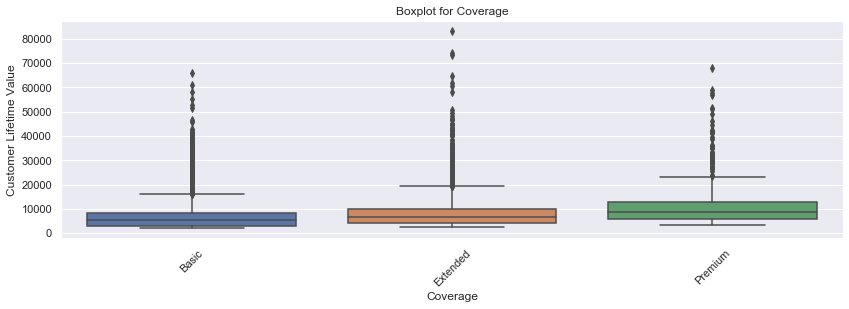

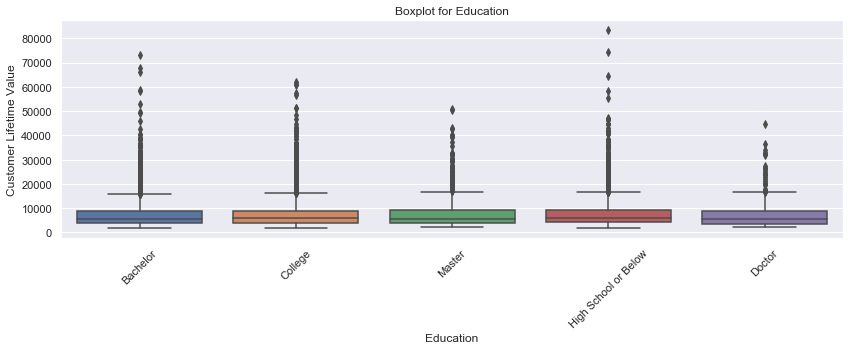

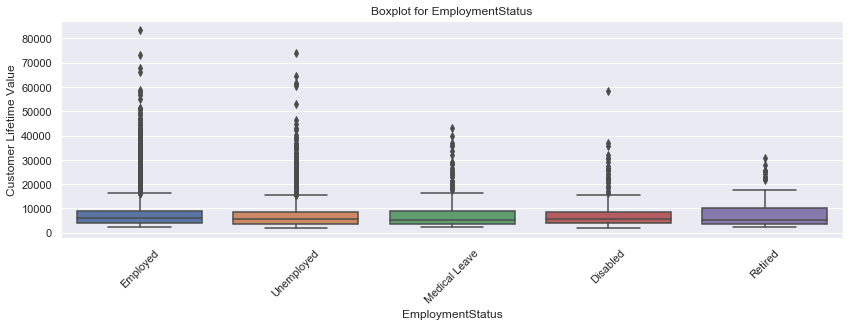

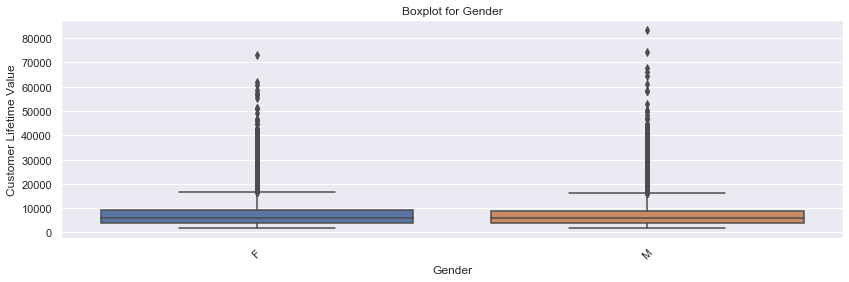

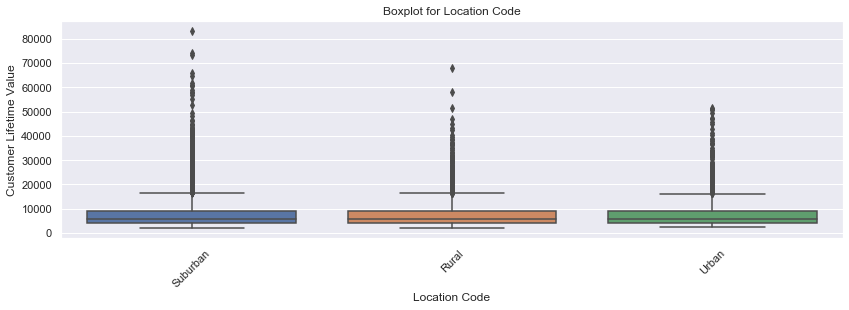

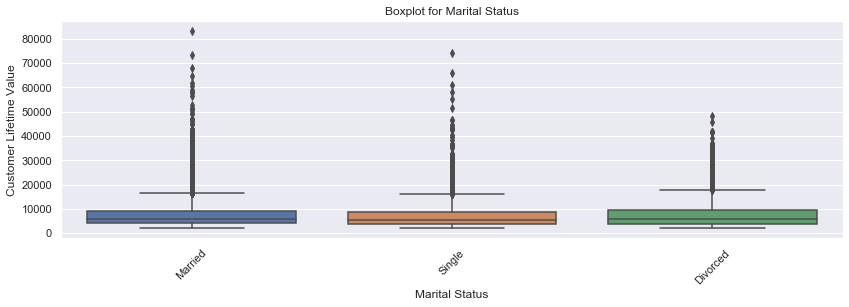

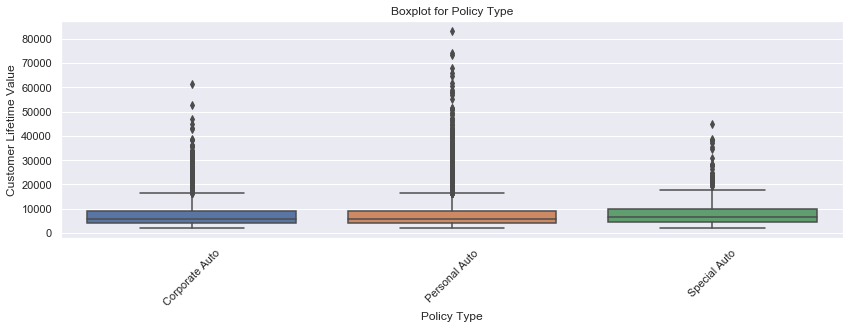

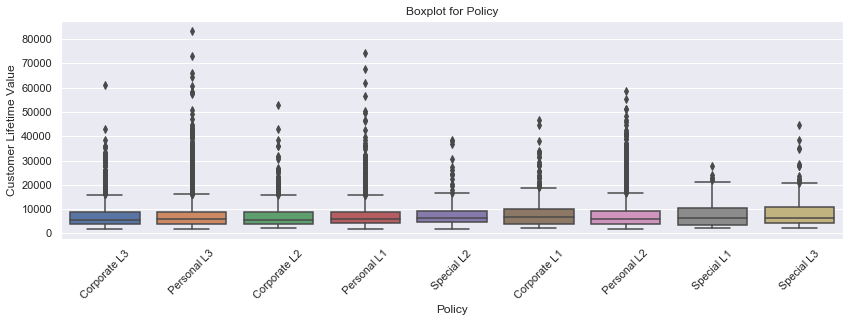

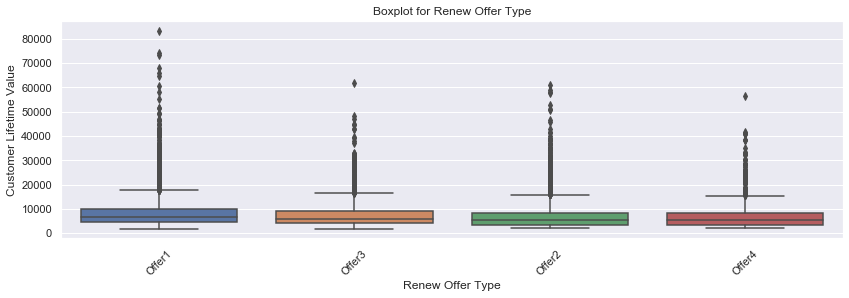

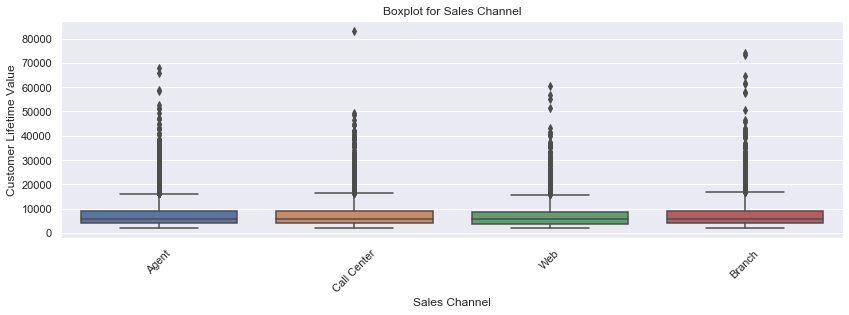

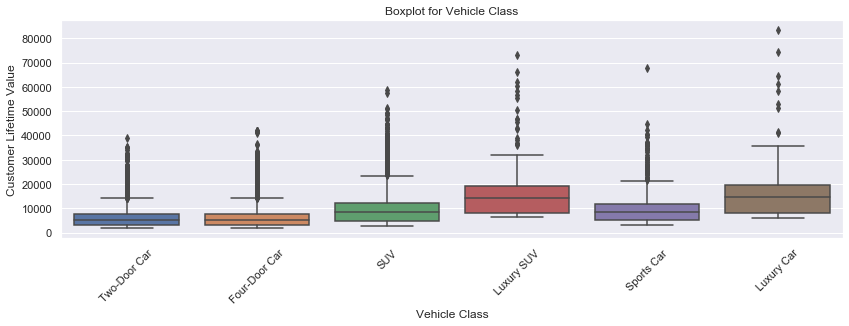

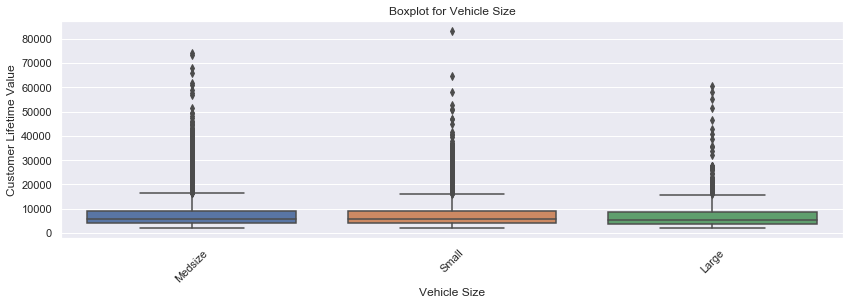

In [83]:
for col in ['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме Vechile Class не могут влиять на CLV. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении CLV с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения CLV по различным параметрам неразличимы:

In [71]:
# Функция для проверки статистической разницы в распределении CLV
# с помощью теста Стьюдента встроенного в функцию ttest_ind()
def get_stat_dif(column):
    # Проверяем характер распределения оценок в зависимости от значений в этом столбце
    cols = data.loc[:, column].value_counts().index
    # Создаём все возможные парные комбинации из элементов списка cols 
    combinations_all = list(combinations(cols, 2))
    # Для каждой пары номинативных значений рассматриваемого столбца
    # выполняем тест Стьюдента 
    for comb in combinations_all:
        # Готовим аргументы для функции ttest_ind()
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'Customer Lifetime Value'], 
                        data.loc[data.loc[:, column] == comb[1], 'Customer Lifetime Value'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break

In [76]:
for col in ['State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Coverage
Найдены статистически значимые различия для колонки EmploymentStatus
Найдены статистически значимые различия для колонки Income
Найдены статистически значимые различия для колонки Monthly Premium Auto
Найдены статистически значимые различия для колонки Months Since Last Claim
Найдены статистически значимые различия для колонки Months Since Policy Inception
Найдены статистически значимые различия для колонки Number of Open Complaints
Найдены статистически значимые различия для колонки Number of Policies
Найдены статистически значимые различия для колонки Renew Offer Type
Найдены статистически значимые различия для колонки Total Claim Amount
Найдены статистически значимые различия для колонки Vehicle Class


Не забываем, что есть сильно скоррелированные параметры, а именно Total Claim Amount и Income, Total Claim Amount и Monthly PremiuLm Audio. Поскольку Customer Lifetime Value положительно коррелирует с Monthly PremiuLm Audio примем решение удалить признак Total Claim Amount.

In [12]:
data = data.drop(['Total Claim Amount',], axis=1)

##  Catboost

На основании результатов, полученных выше,создадим список категориальных признаков для передачи списка в классификатор cat boost. Несмотря на то, что формально признак Number of Policies числовой (по формату данных, отнесем его к категориальным, потому что не похоже, что количество полисов является непрерывной величиной

In [3]:
# Расчет MAPE 
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [13]:
cat_cols = ['Coverage', 'EmploymentStatus', 'Number of Policies', 'Renew Offer Type', 'Vehicle Class']

In [145]:
# Подготовим данные для обучения модели
y = data["Customer Lifetime Value"]
# Удаляем все лишние признаки
X = data.drop(columns=['Customer', 'State', 'Customer Lifetime Value', 'Response',
       'Education', 'Effective To Date', 'Gender', 'Location Code', 'Marital Status', 
        'Policy Type',
       'Policy', 'Sales Channel',
       'Vehicle Size'])
# разобьем выборку на тест и трейн
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

### Подбор гиперпараметров

In [110]:
#определим модель
model = CatBoostRegressor(iterations=1000)

In [111]:
train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_test, cat_features=cat_cols)

In [112]:
#подберем параметры с помощью сетки (долго считается без GPU, порядка 3-4 часов, не успела до дедлайна)
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 8, 10, 12],
    'l2_leaf_reg': [0,5, 1, 3, 5, 7, 9],
    'iterations': [1000, 2000, 3000, 4000, 5000, 6000],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS', None],
    #'eval_metric': ['MAPE'],
    'od_type': ['Iter', 'IncToDec']  
}
grid_search_results = model.grid_search(grid, train_pool, shuffle=False, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3672.177729
bestIteration = 182

0:	loss: 3672.1777293	best: 3672.1777293 (0)	total: 652ms	remaining: 36m 31s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3649.795047
bestIteration = 291

1:	loss: 3649.7950467	best: 3649.7950467 (1)	total: 1.34s	remaining: 37m 31s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3627.314639
bestIteration = 426

2:	loss: 3627.3146385	best: 3627.3146385 (2)	total: 2.6s	remaining: 48m 31s

bestTest = 3669.08017
bestIteration = 368

3:	loss: 3669.0801697	best: 3627.3146385 (2)	total: 4.67s	remaining: 1h 5m 16s

bestTest = 3649.432073
bestIteration = 321

4:	loss: 3649.4320734	best: 3627.3146385 (2)	total: 6.67s	remaining: 1h 14m 36s

bestTest = 3627.314639
bestIteration = 426

5:	loss: 3627.3146385	best: 3627.3146385 (2)	total: 9.07s	remaining: 1h 24m 31s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3647.238756
bestIteration = 58

6:

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3627.019133
bestIteration = 88

54:	loss: 3627.0191330	best: 3611.5794353 (47)	total: 1m 10s	remaining: 1h 10m 53s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3626.564936
bestIteration = 57

55:	loss: 3626.5649359	best: 3611.5794353 (47)	total: 1m 10s	remaining: 1h 9m 44s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3624.583027
bestIteration = 211

56:	loss: 3624.5830271	best: 3611.5794353 (47)	total: 1m 11s	remaining: 1h 8m 59s

bestTest = 3624.240083
bestIteration = 133

57:	loss: 3624.2400825	best: 3611.5794353 (47)	total: 1m 13s	remaining: 1h 9m 49s

bestTest = 3624.389302
bestIteration = 95

58:	loss: 3624.3893025	best: 3611.5794353 (47)	total: 1m 15s	remaining: 1h 10m 41s

bestTest = 3624.583027
bestIteration = 211

59:	loss: 3624.5830271	best: 3611.5794353 (47)	total: 1m 18s	remaining: 1h 12m 4s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3642.119388


bestTest = 3624.583027
bestIteration = 211

107:	loss: 3624.5830271	best: 3605.4693094 (71)	total: 2m 56s	remaining: 1h 28m 47s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3660.604967
bestIteration = 220

108:	loss: 3660.6049667	best: 3605.4693094 (71)	total: 2m 57s	remaining: 1h 28m 10s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3646.810315
bestIteration = 196

109:	loss: 3646.8103146	best: 3605.4693094 (71)	total: 2m 57s	remaining: 1h 27m 33s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3670.829625
bestIteration = 217

110:	loss: 3670.8296251	best: 3605.4693094 (71)	total: 2m 58s	remaining: 1h 27m

bestTest = 3660.604967
bestIteration = 220

111:	loss: 3660.6049667	best: 3605.4693094 (71)	total: 3m 2s	remaining: 1h 28m 17s

bestTest = 3640.708082
bestIteration = 431

112:	loss: 3640.7080817	best: 3605.4693094 (71)	total: 3m 6s	remaining: 1h 29m 29s

bestTest = 3662.752624
bestIteration = 574

113:	loss: 3662.7526243	b


bestTest = 3651.206146
bestIteration = 324

160:	loss: 3651.2061464	best: 3605.4693094 (71)	total: 5m 7s	remaining: 1h 41m 41s

bestTest = 3626.395125
bestIteration = 954

161:	loss: 3626.3951250	best: 3605.4693094 (71)	total: 5m 11s	remaining: 1h 42m 29s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3654.196141
bestIteration = 66

162:	loss: 3654.1961408	best: 3605.4693094 (71)	total: 5m 11s	remaining: 1h 41m 53s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3659.667635
bestIteration = 76

163:	loss: 3659.6676351	best: 3605.4693094 (71)	total: 5m 11s	remaining: 1h 41m 20s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3643.826493
bestIteration = 173

164:	loss: 3643.8264928	best: 3605.4693094 (71)	total: 5m 13s	remaining: 1h 41m 1s

bestTest = 3654.196141
bestIteration = 66

165:	loss: 3654.1961408	best: 3605.4693094 (71)	total: 5m 17s	remaining: 1h 41m 55s

bestTest = 3659.667635
bestIteration = 76

166:	loss: 3659.6676351	b


bestTest = 3627.437732
bestIteration = 365

213:	loss: 3627.4377324	best: 3605.4693094 (71)	total: 8m 7s	remaining: 1h 59m 22s

bestTest = 3642.695656
bestIteration = 111

214:	loss: 3642.6956559	best: 3605.4693094 (71)	total: 8m 13s	remaining: 2h 16s

bestTest = 3611.579435
bestIteration = 188

215:	loss: 3611.5794353	best: 3605.4693094 (71)	total: 8m 20s	remaining: 2h 1m 29s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3650.223007
bestIteration = 222

216:	loss: 3650.2230069	best: 3605.4693094 (71)	total: 8m 21s	remaining: 2h 1m 1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3646.628423
bestIteration = 225

217:	loss: 3646.6284226	best: 3605.4693094 (71)	total: 8m 21s	remaining: 2h 33s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3649.577359
bestIteration = 240

218:	loss: 3649.5773593	best: 3605.4693094 (71)	total: 8m 22s	remaining: 2h 5s

bestTest = 3648.833083
bestIteration = 579

219:	loss: 3648.8330835	best: 3605.4


bestTest = 3648.833083
bestIteration = 579

267:	loss: 3648.8330835	best: 3605.4693094 (71)	total: 11m 52s	remaining: 2h 17m 2s

bestTest = 3645.890023
bestIteration = 272

268:	loss: 3645.8900229	best: 3605.4693094 (71)	total: 12m 2s	remaining: 2h 18m 18s

bestTest = 3628.110291
bestIteration = 1189

269:	loss: 3628.1102915	best: 3605.4693094 (71)	total: 12m 12s	remaining: 2h 19m 46s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3627.019133
bestIteration = 88

270:	loss: 3627.0191330	best: 3605.4693094 (71)	total: 12m 13s	remaining: 2h 19m 16s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3626.564936
bestIteration = 57

271:	loss: 3626.5649359	best: 3605.4693094 (71)	total: 12m 13s	remaining: 2h 18m 44s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3624.583027
bestIteration = 211

272:	loss: 3624.5830271	best: 3605.4693094 (71)	total: 12m 13s	remaining: 2h 18m 18s

bestTest = 3624.240083
bestIteration = 133

273:	loss: 3624.

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3615.762761
bestIteration = 181

320:	loss: 3615.7627615	best: 3605.4693094 (71)	total: 16m 10s	remaining: 2h 33m 10s

bestTest = 3648.298992
bestIteration = 117

321:	loss: 3648.2989919	best: 3605.4693094 (71)	total: 16m 21s	remaining: 2h 34m 15s

bestTest = 3610.52997
bestIteration = 214

322:	loss: 3610.5299700	best: 3605.4693094 (71)	total: 16m 29s	remaining: 2h 35m 7s

bestTest = 3605.469309
bestIteration = 397

323:	loss: 3605.4693094	best: 3605.4693094 (71)	total: 16m 40s	remaining: 2h 36m 16s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3655.258821
bestIteration = 295

324:	loss: 3655.2588214	best: 3605.4693094 (71)	total: 16m 41s	remaining: 2h 35m 52s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3653.585355
bestIteration = 232

325:	loss: 3653.5853555	best: 3605.4693094 (71)	total: 16m 42s	remaining: 2h 35m 26s
Stopped by overfitting detector  (20 iterations wait)

bestT

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3651.225086
bestIteration = 224

373:	loss: 3651.2250862	best: 3605.4693094 (71)	total: 21m 32s	remaining: 2h 51m 58s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3652.918936
bestIteration = 224

374:	loss: 3652.9189359	best: 3605.4693094 (71)	total: 21m 33s	remaining: 2h 51m 32s

bestTest = 3649.655768
bestIteration = 334

375:	loss: 3649.6557676	best: 3605.4693094 (71)	total: 21m 46s	remaining: 2h 52m 48s

bestTest = 3642.986185
bestIteration = 479

376:	loss: 3642.9861848	best: 3605.4693094 (71)	total: 21m 58s	remaining: 2h 53m 49s

bestTest = 3636.219476
bestIteration = 505

377:	loss: 3636.2194757	best: 3605.4693094 (71)	total: 22m 10s	remaining: 2h 55m
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3633.03859
bestIteration = 48

378:	loss: 3633.0385904	best: 3605.4693094 (71)	total: 22m 11s	remaining: 2h 54m 30s
Stopped by overfitting detector  (20 iterations wait)

bestTest 

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3647.238756
bestIteration = 58

426:	loss: 3647.2387563	best: 3605.4693094 (71)	total: 27m 25s	remaining: 3h 8m 19s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3621.123819
bestIteration = 65

427:	loss: 3621.1238191	best: 3605.4693094 (71)	total: 27m 25s	remaining: 3h 7m 50s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3667.465536
bestIteration = 57

428:	loss: 3667.4655356	best: 3605.4693094 (71)	total: 27m 25s	remaining: 3h 7m 21s

bestTest = 3642.460979
bestIteration = 93

429:	loss: 3642.4609789	best: 3605.4693094 (71)	total: 27m 38s	remaining: 3h 8m 21s

bestTest = 3617.791282
bestIteration = 89

430:	loss: 3617.7912824	best: 3605.4693094 (71)	total: 27m 51s	remaining: 3h 9m 18s

bestTest = 3626.484279
bestIteration = 165

431:	loss: 3626.4842791	best: 3605.4693094 (71)	total: 28m 7s	remaining: 3h 10m 34s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 365


bestTest = 3624.583027
bestIteration = 211

479:	loss: 3624.5830271	best: 3605.4693094 (71)	total: 33m 49s	remaining: 3h 22m 59s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3642.119388
bestIteration = 227

480:	loss: 3642.1193878	best: 3605.4693094 (71)	total: 33m 50s	remaining: 3h 22m 33s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3655.847952
bestIteration = 221

481:	loss: 3655.8479520	best: 3605.4693094 (71)	total: 33m 51s	remaining: 3h 22m 7s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3662.011365
bestIteration = 251

482:	loss: 3662.0113645	best: 3605.4693094 (71)	total: 33m 51s	remaining: 3h 21m 42s

bestTest = 3631.241203
bestIteration = 543

483:	loss: 3631.2412026	best: 3605.4693094 (71)	total: 34m 5s	remaining: 3h 22m 32s

bestTest = 3655.788588
bestIteration = 249

484:	loss: 3655.7885879	best: 3605.4693094 (71)	total: 34m 17s	remaining: 3h 23m 18s

bestTest = 3650.437523
bestIteration = 2252

485:	loss: 365


bestTest = 3648.077896
bestIteration = 714

531:	loss: 3648.0778962	best: 3580.4121610 (527)	total: 37m 37s	remaining: 3h 20m

bestTest = 3633.906478
bestIteration = 656

532:	loss: 3633.9064780	best: 3580.4121610 (527)	total: 37m 41s	remaining: 3h 19m 54s

bestTest = 3614.455979
bestIteration = 745

533:	loss: 3614.4559786	best: 3580.4121610 (527)	total: 37m 45s	remaining: 3h 19m 49s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3658.508823
bestIteration = 87

534:	loss: 3658.5088233	best: 3580.4121610 (527)	total: 37m 45s	remaining: 3h 19m 25s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3665.604821
bestIteration = 67

535:	loss: 3665.6048210	best: 3580.4121610 (527)	total: 37m 46s	remaining: 3h 19m
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3648.842645
bestIteration = 83

536:	loss: 3648.8426449	best: 3580.4121610 (527)	total: 37m 46s	remaining: 3h 18m 35s

bestTest = 3628.753399
bestIteration = 276

537:	loss: 3628.75

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3662.197926
bestIteration = 67

584:	loss: 3662.1979255	best: 3580.4121610 (527)	total: 39m 40s	remaining: 3h 8m 10s

bestTest = 3662.202849
bestIteration = 286

585:	loss: 3662.2028490	best: 3580.4121610 (527)	total: 39m 44s	remaining: 3h 8m 7s

bestTest = 3662.457208
bestIteration = 122

586:	loss: 3662.4572076	best: 3580.4121610 (527)	total: 39m 48s	remaining: 3h 8m 2s

bestTest = 3573.393391
bestIteration = 645

587:	loss: 3573.3933910	best: 3573.3933910 (587)	total: 39m 52s	remaining: 3h 7m 57s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3661.791032
bestIteration = 166

588:	loss: 3661.7910324	best: 3573.3933910 (587)	total: 39m 52s	remaining: 3h 7m 37s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3655.262578
bestIteration = 170

589:	loss: 3655.2625779	best: 3573.3933910 (587)	total: 39m 53s	remaining: 3h 7m 17s
Stopped by overfitting detector  (20 iterations wait)

bestTe

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3671.505035
bestIteration = 261

637:	loss: 3671.5050346	best: 3573.3933910 (587)	total: 43m 22s	remaining: 3h 5m 1s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3641.653629
bestIteration = 275

638:	loss: 3641.6536285	best: 3573.3933910 (587)	total: 43m 23s	remaining: 3h 4m 45s

bestTest = 3622.204267
bestIteration = 652

639:	loss: 3622.2042666	best: 3573.3933910 (587)	total: 43m 30s	remaining: 3h 4m 55s

bestTest = 3633.872276
bestIteration = 1023

640:	loss: 3633.8722762	best: 3573.3933910 (587)	total: 43m 38s	remaining: 3h 5m 7s

bestTest = 3605.730156
bestIteration = 1240

641:	loss: 3605.7301560	best: 3573.3933910 (587)	total: 43m 46s	remaining: 3h 5m 20s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3624.591868
bestIteration = 120

642:	loss: 3624.5918683	best: 3573.3933910 (587)	total: 43m 47s	remaining: 3h 5m 1s
Stopped by overfitting detector  (20 iterations wait)

best

Stopped by overfitting detector  (20 iterations wait)

bestTest = 3624.591868
bestIteration = 120

690:	loss: 3624.5918683	best: 3573.3933910 (587)	total: 47m 52s	remaining: 3h 4m 53s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3684.370435
bestIteration = 45

691:	loss: 3684.3704351	best: 3573.3933910 (587)	total: 47m 52s	remaining: 3h 4m 34s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3588.271782
bestIteration = 219

692:	loss: 3588.2717820	best: 3573.3933910 (587)	total: 47m 53s	remaining: 3h 4m 17s

bestTest = 3624.591868
bestIteration = 120

693:	loss: 3624.5918683	best: 3573.3933910 (587)	total: 48m 5s	remaining: 3h 4m 44s

bestTest = 3658.29423
bestIteration = 198

694:	loss: 3658.2942297	best: 3573.3933910 (587)	total: 48m 16s	remaining: 3h 5m 8s

bestTest = 3580.412161
bestIteration = 261

695:	loss: 3580.4121610	best: 3573.3933910 (587)	total: 48m 29s	remaining: 3h 5m 35s
Stopped by overfitting detector  (20 iterations wait)

bestTes


bestTest = 3615.302988
bestIteration = 345

743:	loss: 3615.3029884	best: 3573.3933910 (587)	total: 53m 57s	remaining: 3h 9m 43s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3636.748516
bestIteration = 287

744:	loss: 3636.7485162	best: 3573.3933910 (587)	total: 53m 58s	remaining: 3h 9m 28s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3657.289525
bestIteration = 271

745:	loss: 3657.2895253	best: 3573.3933910 (587)	total: 54m	remaining: 3h 9m 13s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 3635.346488
bestIteration = 528

746:	loss: 3635.3464883	best: 3573.3933910 (587)	total: 54m 2s	remaining: 3h 9m 2s

bestTest = 3626.352256
bestIteration = 932

747:	loss: 3626.3522557	best: 3573.3933910 (587)	total: 54m 16s	remaining: 3h 9m 30s

bestTest = 3647.956339
bestIteration = 479

748:	loss: 3647.9563391	best: 3573.3933910 (587)	total: 54m 30s	remaining: 3h 10m

bestTest = 3631.956487
bestIteration = 1061

749:	loss: 3631.95648

KeyboardInterrupt: 

In [ ]:
#параметры для лучшего значения
grid_search_results['params']

In [ ]:
#посмотрим на все параметры модели
model.get_all_params()

In [ ]:
#предсказываем
predicted = model.predict(test_pool)
predicted

In [ ]:
#оценим MAPE
test_predict_catboost = model.predict(X_test)
print(f"Catboost mape: {(mape(y_test, predicted))*100:0.2f}%")

### Catboost без подбора гиперпараметров

In [146]:
cbr = CatBoostRegressor(iterations = 5000,
                          #depth=10,
                          #learning_rate = 0.5,
                          random_seed = 10,
                          eval_metric='MAPE',
                          custom_metric=['RMSE', 'MAE'],
                          od_wait=500,
                          #task_type='GPU',
                         )
cbr.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose_eval=100,
         use_best_model=True,
        cat_features=cat_cols,
         #plot=True
         )

Learning rate set to 0.024005
0:	learn: 0.7325273	test: 0.7596627	best: 0.7596627 (0)	total: 7.31ms	remaining: 36.5s
100:	learn: 0.1844143	test: 0.1861439	best: 0.1861439 (100)	total: 521ms	remaining: 25.3s
200:	learn: 0.1343338	test: 0.1333180	best: 0.1333180 (200)	total: 966ms	remaining: 23.1s
300:	learn: 0.1278737	test: 0.1276465	best: 0.1276367 (298)	total: 1.42s	remaining: 22.2s
400:	learn: 0.1232972	test: 0.1241720	best: 0.1241638 (399)	total: 1.97s	remaining: 22.6s
500:	learn: 0.1197387	test: 0.1220768	best: 0.1220526 (497)	total: 2.5s	remaining: 22.4s
600:	learn: 0.1176149	test: 0.1212851	best: 0.1212851 (600)	total: 2.94s	remaining: 21.6s
700:	learn: 0.1157023	test: 0.1202117	best: 0.1202117 (700)	total: 3.41s	remaining: 20.9s
800:	learn: 0.1132390	test: 0.1184612	best: 0.1184377 (799)	total: 3.89s	remaining: 20.4s
900:	learn: 0.1116439	test: 0.1171815	best: 0.1171815 (900)	total: 4.41s	remaining: 20.1s
1000:	learn: 0.1099725	test: 0.1165050	best: 0.1164845 (997)	total: 4.89s	

In [147]:
predict_catboost = cbr.predict(X_test)
print(f"Catboost mape: {(mape(y_test, predict_catboost))*100:0.2f}%")

Catboost mape: 11.09%


### Значимость признаков

In [148]:
#посмотрим на значимость призанков
cbr.get_feature_importance()

array([ 4.48850762,  1.57519064,  5.79545874, 15.76934968,  7.63408461,
        5.9463314 ,  1.06840694, 45.44514109,  2.78541072,  9.49211856])

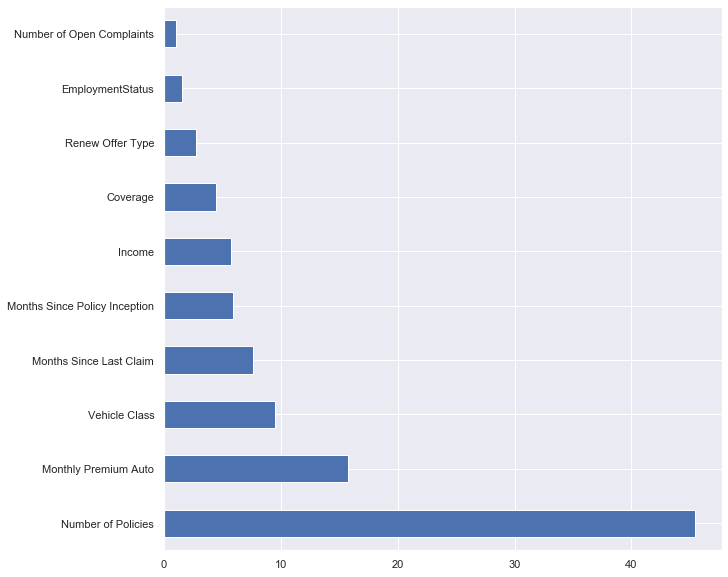

In [149]:
#выведем значимость на графике
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(cbr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

#### SHAP

интересные результаты дает shap  - библиотека для визуализации вклада фичей в значение таргета

In [150]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(cbr)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_cols))

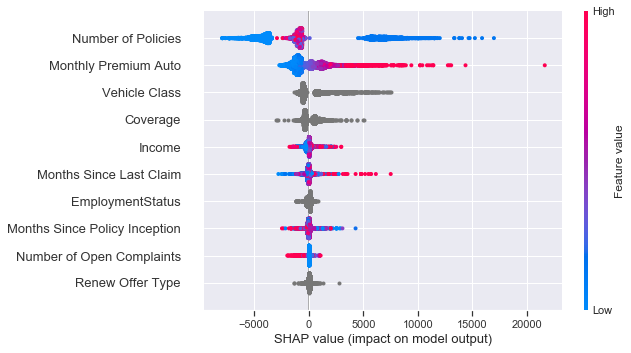

In [151]:
#резюмируем эффект от всех фичей
shap.summary_plot(shap_values, X)

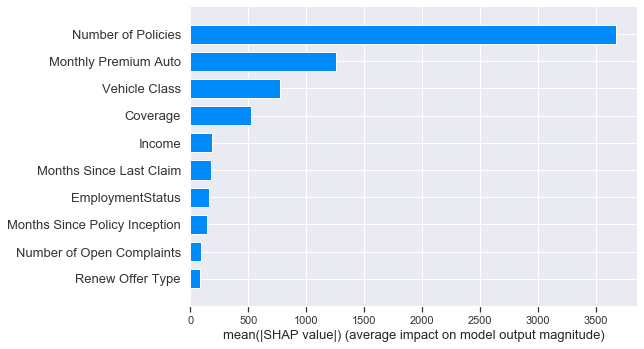

In [152]:
shap.summary_plot(shap_values, X, plot_type="bar")

## XGBoost

In [14]:
#в отличие от Catboost, XGBoost не может "переварить" категориальные фичи без предобработки, поэтому будем использовать
#get_dummies
data = pd.get_dummies(data, columns=cat_cols, dummy_na=False)

In [15]:
y = data["Customer Lifetime Value"]
# Удаляем все лишние признаки
X = data.drop(columns=['Customer', 'State', 'Customer Lifetime Value', 'Response',
       'Education', 'Effective To Date', 'Gender', 'Location Code', 'Marital Status', 
        'Policy Type',
       'Policy', 'Sales Channel',
       'Vehicle Size'])

In [16]:
# Первая XGBoost модель
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
 # обучаем модель на тренировочной выборке
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
# делаем предсказание на тестовой выборке
predict_xgb = xgb.predict(X_test)

[08:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
print(f"XGBoost mape: {(mape(y_test, predict_xgb))*100:0.2f}%")

XGBoost mape: 12.88%


In [ ]:
def hyperopt_xgb_score(params):
    xgb = XGBRegressor(**params)
    # усреднение по 3ем фолдам, для уменьшения влияния стохастичности
    # для ускорения можно использовать train_test_split один раз
    current_score = cross_val_score(xgb, X_train, y_train, cv=3).mean()
    print(current_score, params)
    return -current_score


space_xgb2 = {
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'eval_metric': 'auc',
    'objective': 'binary:logistic',
    # 'nthread': 4,
    'booster': 'gbtree',
    'tree_method': 'exact',
    'silent': 1
}

best = fmin(fn=hyperopt_xgb_score, space=space_xgb2,
            algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

### Значимость признаков

In [17]:
print(xgb.feature_importances_)

[0.01298833 0.14624013 0.02879182 0.00940817 0.00494417 0.
 0.00252747 0.01333519 0.00328075 0.01321031 0.         0.
 0.         0.1506694  0.5131968  0.         0.         0.
 0.         0.         0.         0.         0.0144385  0.00463127
 0.01128774 0.00239515 0.01267685 0.         0.01094876 0.01663928
 0.01876781 0.00962206]


В XGBoost есть функция plot_importance, которая используется для построения графика для признаков, упорядоченных по их важности

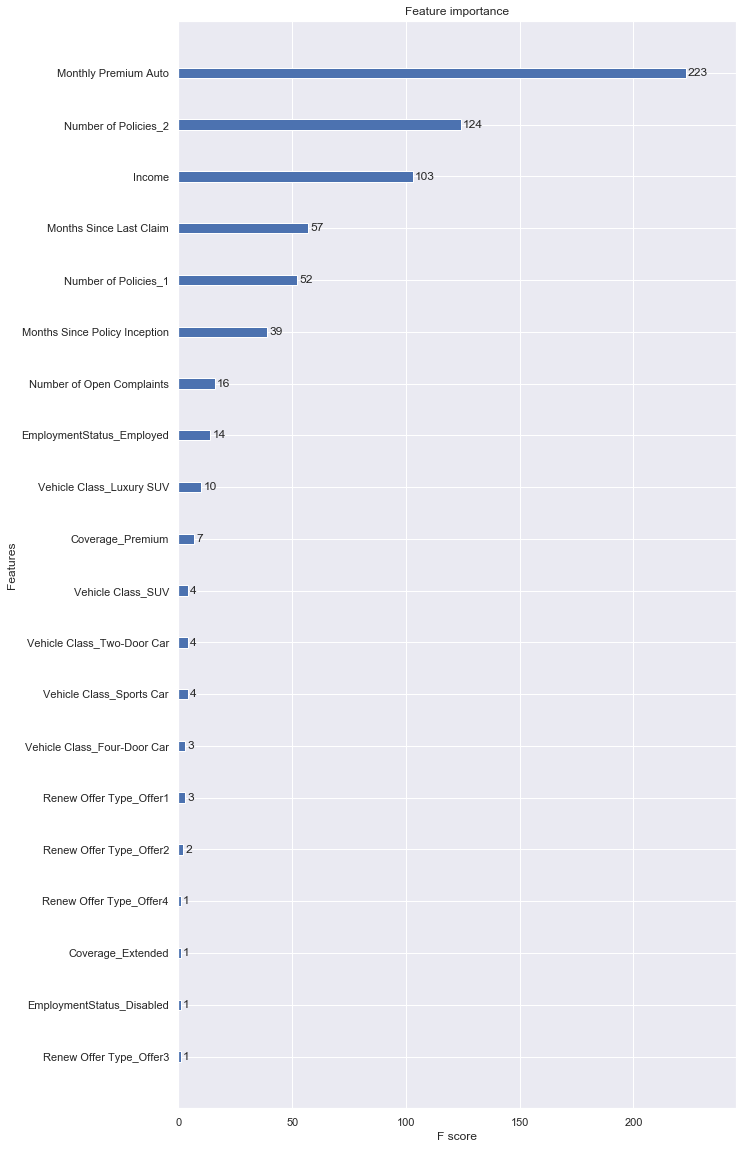

In [159]:
fig, ax = plt.subplots(figsize=(10,20))
plot_importance(xgb, ax=ax)

## Выводы

- наилучший результат по метрике MAPE 11.09% получился для модели Catboost
- Number of Policies, Monthly Premium Auto и Vehicle Class имеют для CLV наибольшую значимость

## Точки роста
- Скорректировать набор признаков на основе их значимости (результаты значимости получены)
- Добавить больше гиперпараметров в GridSearch и Hyperopt, изменить диапазоны гиперпараметров
- Тщательнее изучить распределение некоторых признаков, например логарифмировать их или использовать другие преобразования при необходимости, чтобы сделать распределение нормальным